In [56]:
# import necessary library for python programming

import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from sklearn.tree import export_text, DecisionTreeClassifier

In [57]:
# importing csv file for intrusion detection based on AI-ML model
#data_csv = pd.read_csv('https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FEntire%20Dataset&files=UNSW_2018_IoT_Botnet_Dataset_1.csv', low_memory=False, header=None, nrows=20000)
data_csv = pd.read_csv('/home/rajeev/Desktop/DataSet/UNSW_2018_IoT_Botnet_Dataset_1.csv', low_memory=False, header=None, nrows=20000)

In [58]:
# verify data set rows and columns
data_csv.shape

(20000, 35)

In [59]:
# assign columns to data set
data_csv.columns = ['pkSeqID','stime','flgs','proto','saddr','sport','daddr','dport','pkts','bytes',
                   'state','ltime','seq','dur','mean','stddev','smac','dmac','sum','min','max',
                   'soui','doui','sco','dco','spkts','dpkts','sbytes','dbytes','rate','srate','drate',
                   'attack','category','subcategory']

In [60]:
# verify data with column name
data_csv.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,...,2,2,120,120,0.002508,0.000836,0.000836,0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5,5,350,330,0.006190,0.002751,0.002751,0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1,1,90,90,20.590960,0.000000,0.000000,0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,...,5,5,210,300,0.006189,0.002751,0.002751,0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2,2,174,456,0.005264,0.001755,0.001755,0,Normal,Normal


In [61]:
# data set object info - string or int
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pkSeqID      20000 non-null  int64  
 1   stime        20000 non-null  float64
 2   flgs         20000 non-null  object 
 3   proto        20000 non-null  object 
 4   saddr        20000 non-null  object 
 5   sport        19978 non-null  object 
 6   daddr        20000 non-null  object 
 7   dport        19978 non-null  object 
 8   pkts         20000 non-null  int64  
 9   bytes        20000 non-null  int64  
 10  state        20000 non-null  object 
 11  ltime        20000 non-null  float64
 12  seq          20000 non-null  int64  
 13  dur          20000 non-null  float64
 14  mean         20000 non-null  float64
 15  stddev       20000 non-null  float64
 16  smac         0 non-null      float64
 17  dmac         0 non-null      float64
 18  sum          20000 non-null  float64
 19  min 

In [62]:
# below command will identify the null value in table and based on that it will clean up the data
data_csv.isnull().sum()


pkSeqID            0
stime              0
flgs               0
proto              0
saddr              0
sport             22
daddr              0
dport             22
pkts               0
bytes              0
state              0
ltime              0
seq                0
dur                0
mean               0
stddev             0
smac           20000
dmac           20000
sum                0
min                0
max                0
soui           20000
doui           20000
sco            20000
dco            20000
spkts              0
dpkts              0
sbytes             0
dbytes             0
rate               0
srate              0
drate              0
attack             0
category           0
subcategory        0
dtype: int64

In [63]:
# data preprocessing - in this, deleting un-necessary tables and null holding table
del data_csv ['smac']
del data_csv ['dmac']
del data_csv ['stime']
del data_csv ['ltime']
del data_csv ['soui']
del data_csv ['doui']
del data_csv ['sco']
del data_csv ['dco']
del data_csv ['saddr']
del data_csv ['daddr']
del data_csv ['attack']
del data_csv ['subcategory']

In [64]:
# verify no. of rows and columns after unused table deletion
data_csv.shape

(20000, 23)

In [65]:
# data analysis model will be based on source and destinatio port and this data is in string, converting it to numeric
data_csv['sport'] = data_csv['sport'].apply(pd.to_numeric,  errors='coerce')
data_csv['dport'] = data_csv['dport'].apply(pd.to_numeric,  errors='coerce')


In [66]:
# drop all NaN, or null value from table
data_csv.dropna(inplace=True)

In [67]:
# the data set is cleaned up and below is the output
data_csv

,pkSeqID,flgs,proto,sport,dport,pkts,bytes,state,seq,dur,...,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,category
1,2,e,tcp,139.0,36390.0,10,680,CON,10,1453.945923,...,0.000022,0.000042,5,5,350,330,0.006190,0.002751,0.002751,Normal
2,3,e,udp,51838.0,123.0,2,180,CON,11,0.048565,...,0.048565,0.048565,1,1,90,90,20.590960,0.000000,0.000000,Normal
4,5,e,udp,58999.0,53.0,4,630,CON,14,569.933960,...,0.018356,0.178655,2,2,174,456,0.005264,0.001755,0.001755,Normal
7,8,e,udp,58360.0,53.0,2,172,INT,18,2.500101,...,0.000000,0.000000,2,0,172,0,0.399984,0.399984,0.000000,Normal
8,9,e,udp,37214.0,53.0,2,172,INT,41,2.501101,...,0.000000,0.000000,2,0,172,0,0.399824,0.399824,0.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,e,tcp,34720.0,3306.0,13,1113,FIN,20597,0.198108,...,0.198108,0.198108,7,6,532,581,60.573021,30.286510,25.238758,Reconnaissance
19996,19997,e,tcp,37616.0,3306.0,13,1113,FIN,20598,0.198896,...,0.198896,0.198896,7,6,532,581,60.333038,30.166519,25.138765,Reconnaissance
19997,19998,e,tcp,46406.0,3306.0,13,1113,FIN,20599,0.198036,...,0.198036,0.198036,7,6,532,581,60.595043,30.297522,25.247934,Reconnaissance
19998,19999,e,tcp,51762.0,3306.0,13,1113,FIN,20600,0.198078,...,0.198078,0.198078,7,6,532,581,60.582191,30.291096,25.242580,Reconnaissance


In [69]:
# determine attack type it is normal or abnormal
set(data_csv.category)

{'Normal', 'Reconnaissance'}

In [70]:
data_csv.columns

Index(['pkSeqID', 'flgs', 'proto', 'sport', 'dport', 'pkts', 'bytes', 'state',
       'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'category'],
      dtype='object')

In [71]:
data_csv.shape

(15986, 23)

In [72]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 1 to 19999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pkSeqID   15986 non-null  int64  
 1   flgs      15986 non-null  object 
 2   proto     15986 non-null  object 
 3   sport     15986 non-null  float64
 4   dport     15986 non-null  float64
 5   pkts      15986 non-null  int64  
 6   bytes     15986 non-null  int64  
 7   state     15986 non-null  object 
 8   seq       15986 non-null  int64  
 9   dur       15986 non-null  float64
 10  mean      15986 non-null  float64
 11  stddev    15986 non-null  float64
 12  sum       15986 non-null  float64
 13  min       15986 non-null  float64
 14  max       15986 non-null  float64
 15  spkts     15986 non-null  int64  
 16  dpkts     15986 non-null  int64  
 17  sbytes    15986 non-null  int64  
 18  dbytes    15986 non-null  int64  
 19  rate      15986 non-null  float64
 20  srate     15986 non-null  fl

In [73]:
# adding dummy table for string to convert into numeric

flgs_dum = pd.get_dummies(data_csv.flgs,prefix='flgs')
proto_dum = pd.get_dummies(data_csv.proto,prefix='proto')
state_dum = pd.get_dummies(data_csv.state,prefix='state')



In [19]:
data_csv.shape

(15986, 23)

In [20]:
# delete original data fields as these are changed to numeric
del data_csv ['flgs']
del data_csv ['state']
del data_csv ['proto']


In [21]:
# merge dummy table with original data for training and sample data test
full_data = pd.concat([data_csv,flgs_dum,proto_dum,state_dum],axis=1)


In [22]:
# print full data set
print(list(full_data.columns))

['pkSeqID', 'sport', 'dport', 'pkts', 'bytes', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'category', 'flgs_e', 'flgs_e &', 'flgs_e d', 'flgs_e s', 'flgs_eU', 'proto_ipv6-icmp', 'proto_tcp', 'proto_udp', 'state_CON', 'state_FIN', 'state_INT', 'state_NRS', 'state_RST']


In [23]:
# verify the full data set rows and columns
full_data.shape

(15986, 33)

In [24]:
# full data set info type 
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 1 to 19999
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pkSeqID          15986 non-null  int64  
 1   sport            15986 non-null  float64
 2   dport            15986 non-null  float64
 3   pkts             15986 non-null  int64  
 4   bytes            15986 non-null  int64  
 5   seq              15986 non-null  int64  
 6   dur              15986 non-null  float64
 7   mean             15986 non-null  float64
 8   stddev           15986 non-null  float64
 9   sum              15986 non-null  float64
 10  min              15986 non-null  float64
 11  max              15986 non-null  float64
 12  spkts            15986 non-null  int64  
 13  dpkts            15986 non-null  int64  
 14  sbytes           15986 non-null  int64  
 15  dbytes           15986 non-null  int64  
 16  rate             15986 non-null  float64
 17  srate       

In [25]:
# model training will happen based on attack type 
y = full_data.pop('category')

In [74]:
y

1                Normal
2                Normal
4                Normal
7                Normal
8                Normal
              ...      
19995    Reconnaissance
19996    Reconnaissance
19997    Reconnaissance
19998    Reconnaissance
19999    Reconnaissance
Name: category, Length: 15986, dtype: object

In [75]:
full_data.columns

Index(['pkSeqID', 'sport', 'dport', 'pkts', 'bytes', 'seq', 'dur', 'mean',
       'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes',
       'rate', 'srate', 'drate', 'flgs_e', 'flgs_e &', 'flgs_e d', 'flgs_e s',
       'flgs_eU', 'proto_ipv6-icmp', 'proto_tcp', 'proto_udp', 'state_CON',
       'state_FIN', 'state_INT', 'state_NRS', 'state_RST'],
      dtype='object')

In [76]:

x = full_data

In [77]:
x

,pkSeqID,sport,dport,pkts,bytes,seq,dur,mean,stddev,sum,...,flgs_e s,flgs_eU,proto_ipv6-icmp,proto_tcp,proto_udp,state_CON,state_FIN,state_INT,state_NRS,state_RST
1,2,139.0,36390.0,10,680,10,1453.945923,0.000028,0.000008,0.000138,...,0,0,0,1,0,1,0,0,0,0
2,3,51838.0,123.0,2,180,11,0.048565,0.048565,0.000000,0.048565,...,0,0,0,0,1,1,0,0,0,0
4,5,58999.0,53.0,4,630,14,569.933960,0.098505,0.080150,0.197011,...,0,0,0,0,1,1,0,0,0,0
7,8,58360.0,53.0,2,172,18,2.500101,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
8,9,37214.0,53.0,2,172,41,2.501101,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,34720.0,3306.0,13,1113,20597,0.198108,0.198108,0.000000,0.198108,...,0,0,0,1,0,0,1,0,0,0
19996,19997,37616.0,3306.0,13,1113,20598,0.198896,0.198896,0.000000,0.198896,...,0,0,0,1,0,0,1,0,0,0
19997,19998,46406.0,3306.0,13,1113,20599,0.198036,0.198036,0.000000,0.198036,...,0,0,0,1,0,0,1,0,0,0
19998,19999,51762.0,3306.0,13,1113,20600,0.198078,0.198078,0.000000,0.198078,...,0,0,0,1,0,0,1,0,0,0


In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=800)

In [79]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((11190, 32), (11190,), (4796, 32), (4796,))

In [80]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [81]:
log_model.fit(xtrain,ytrain)

/home/rajeev/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
log_model.score(xtrain,ytrain)

0.9953529937444147

In [83]:
log_model.score(xtest,ytest)

0.9947873227689742

In [84]:
pred = log_model.predict(xtest)

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [86]:
confusion_matrix(ytest,pred)

array([[   4,   25],
       [   0, 4767]])

In [87]:
round(accuracy_score(ytest,pred),2)

0.99

In [88]:
print(classification_report(ytest,pred))

                precision    recall  f1-score   support

        Normal       1.00      0.14      0.24        29
Reconnaissance       0.99      1.00      1.00      4767

      accuracy                           0.99      4796
     macro avg       1.00      0.57      0.62      4796
  weighted avg       0.99      0.99      0.99      4796



In [89]:
log_model1 = DecisionTreeClassifier(criterion='entropy')

In [90]:
log_model1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [91]:
tree_rule = export_text(log_model1, feature_names=list(xtrain.columns))

In [92]:
print(tree_rule)

|--- state_CON <= 0.50
|   |--- max <= 0.00
|   |   |--- sbytes <= 68.00
|   |   |   |--- pkSeqID <= 13943.00
|   |   |   |   |--- class: Reconnaissance
|   |   |   |--- pkSeqID >  13943.00
|   |   |   |   |--- class: Normal
|   |   |--- sbytes >  68.00
|   |   |   |--- dport <= 7716.50
|   |   |   |   |--- sport <= 39522.00
|   |   |   |   |   |--- sport <= 34435.00
|   |   |   |   |   |   |--- class: Normal
|   |   |   |   |   |--- sport >  34435.00
|   |   |   |   |   |   |--- srate <= 0.20
|   |   |   |   |   |   |   |--- seq <= 14441.00
|   |   |   |   |   |   |   |   |--- class: Reconnaissance
|   |   |   |   |   |   |   |--- seq >  14441.00
|   |   |   |   |   |   |   |   |--- class: Normal
|   |   |   |   |   |   |--- srate >  0.20
|   |   |   |   |   |   |   |--- class: Normal
|   |   |   |   |--- sport >  39522.00
|   |   |   |   |   |--- class: Normal
|   |   |   |--- dport >  7716.50
|   |   |   |   |--- class: Reconnaissance
|   |--- max >  0.00
|   |   |--- dur <= 40.77
|

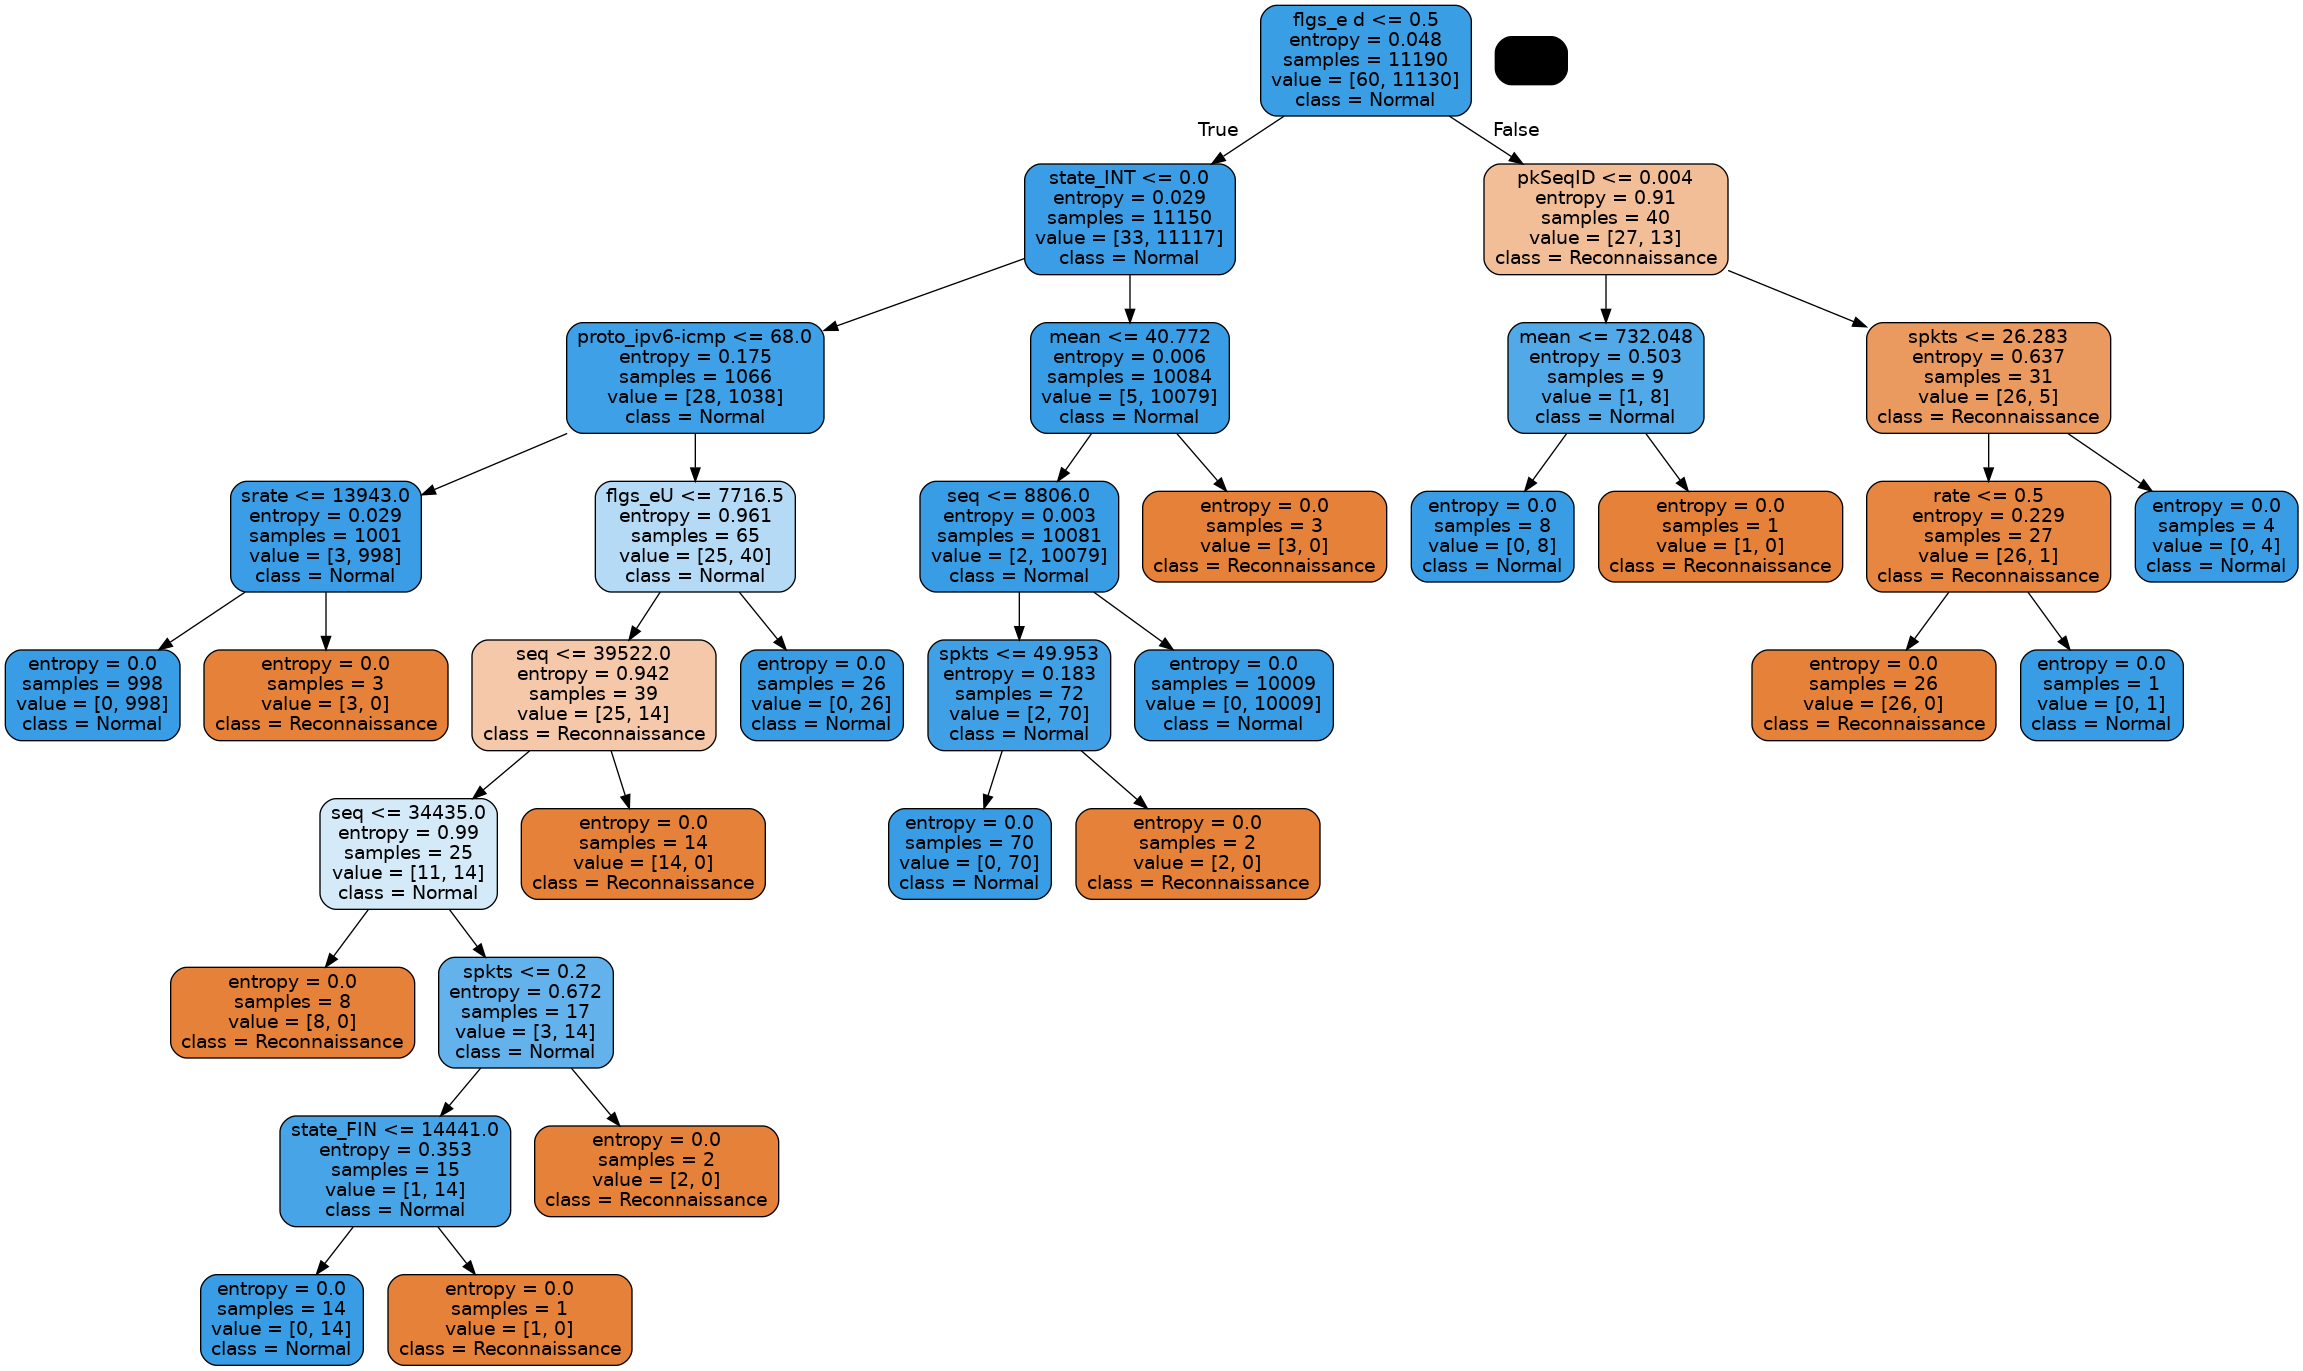

In [93]:
dot_data = tree.export_graphviz(log_model1,
                               out_file=None,
                               filled=True,
                               rounded=True,
                               feature_names=list(set(xtrain.columns)),
                               class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))